<a href="https://colab.research.google.com/github/caalr11/FisicaComputacional1/blob/master/Actividad7/Actividad7_CarlosArias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDAD 7


In [24]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline

Actividad 1
Defina las siguientes matrices.

$$\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 ; 3 \\
   -1 ; 7
   \end{bmatrix}
\end{equation*}$$$$\begin{equation*}
 B =
  \begin{bmatrix}
   5 ; 2 \\
   1 ; 2
   \end{bmatrix}
\end{equation*}$$
y la matrix identidad

$$\begin{equation*}
 I = 
   \begin{bmatrix}
   1 ; 0 \\
   0 ; 1
   \end{bmatrix}
\end{equation*}$$

Calcule el resultado de $2*I+3*A+A@B$.

In [25]:
A=np.array([[1,3],[-1,7]])
B=np.array([[5,2],[1,2]])
I=np.array([[1,0],[0,1]])
#print(A)
#print(B)
#print(I)
R1=2*I+3*A+A@B
print(R1)

[[13 17]
 [-1 35]]


ACTIVIDAD 2
Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación$$
\det(M - \lambda I) = 0
$$Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como$$
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
$$y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

$$
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
$$
El Teorema de Cayley-Hamilton nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico$$
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
$$y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$.

Demuestre esto para cualquier matriz M (2x2), ($\det(M) \neq 0$).

In [31]:
def P2( M ):
  P2 = la.det( M )*np.eye(2, dtype=int) - np.trace( M )*M + mpow( M, 2 )
  print( P2, " = P2(M1) " )

In [32]:
print ( "Inserte los valores de la matriz en orden de filas." )
a = float( input( "valor de a?: " ) )
b = float( input( "valor de b?: " ) )
c = float( input( "valor de c?: " ) )
d = float( input( "valor de d?: " ) )
M1 = np.array( [[a,b],[c,d]] )
print( M1)


Inserte los valores de la matriz en orden de filas.
valor de a?: 2
valor de b?: 3
valor de c?: 4
valor de d?: 5
[[2. 3.]
 [4. 5.]]


In [33]:
detM1 = la.det( M1 )
if detM1 == 0 :
  print ( "El determinante de la matriz es 0, no se puede calcular el polinomico caracteristico." )
else:
  print( "det( M1 )= ", detM1 )
  print( " " )
  P2M1 = P2( M1 )

det( M1 )=  -2.000000000000001
 
[[0. 0.]
 [0. 0.]]  = P2(M1) 


ACTIVIDAD 3
Resuelva el sistema de ecuaciones.

$$\begin{eqnarray*}
x - 3 y + z &amp; = &amp; 1 \\ \nonumber
3 x - 4y + z &amp; = &amp; 5 \\ \nonumber
2 y - z &amp; = &amp; 0 \\ \nonumber
\end{eqnarray*}$$
utilizando el Método de Eliminación Gaussiana y la función scipy.linalg.solve(

In [34]:
def INTER( M, i, j ):
    print( "Intercambio de renglones i y j en la matriz" )
    n = M.shape[0]
    E = np.eye(n)
    E[ i, i ] = 0
    E[ j, j ] = 0
    E[ i, j ] = 1
    E[ j, i ] = 1
    return E @ M

In [35]:
def MULTI( M, k, i ):
    print( "Multiplicacion de i x k en la matriz." )
    n = M.shape[0]
    E = np.eye(n)
    E[ i, i ] = k
    return E @ M

In [36]:
def SUMAR( M, k, i, j ):
    print( "Sumar k veces el renglón j al renglón i en la matriz M" )
    n = M.shape[0]
    E = np.eye(n)
    if i == j:
        E[ i, i ] = k + 1
    else:
        E[ i, j ] = k
    return E @ M

In [37]:
M = np.array( [ [ 1., -3., 1. ], [ 3., -4., 1. ], [ 0., 2., -1. ] ] )
print( M, " = matriz" )
print( "det(M) = ", la.det(M) )
MI = np.hstack( [ M, np.eye( 3 ) ] )
print( MI, " = MI" )

[[ 1. -3.  1.]
 [ 3. -4.  1.]
 [ 0.  2. -1.]]  = matriz
det(M) =  -1.0000000000000004
[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]  = MI


In [39]:
MI1 = SUMAR( MI, -3, 1, 0 )
print( MI1) 

Sumar k veces el renglón j al renglón i en la matriz M
[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [40]:
MI2 = SUMAR( MI1, -2/5, 2, 1 )
print( MI2 )
MI2int = MULTI ( MI2, -5, 2 )
print( MI2int )
MI2int2 = MULTI ( MI2int, -5, 0 )
print( MI2int2 )
MI3 = SUMAR( MI2int2, -3, 0, 1 )
print( MI3 )

Sumar k veces el renglón j al renglón i en la matriz M
[[ 1.  -3.   1.   1.   0.   0. ]
 [ 0.   5.  -2.  -3.   1.   0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]
Multiplicacion de i x k en la matriz.
[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  0.  1. -6.  2. -5.]]
Multiplicacion de i x k en la matriz.
[[-5. 15. -5. -5.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  0.  1. -6.  2. -5.]]
Sumar k veces el renglón j al renglón i en la matriz M
[[-5.  0.  1.  4. -3.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  0.  1. -6.  2. -5.]]


In [41]:
MI3int = MULTI ( MI3, 2, 2 )
print( MI3int )
MI4 = SUMAR( MI3int, 1, 1, 2 )
print( MI4 )
MI4int = MULTI ( MI4, 1/2, 2 )
print( MI4int )
MI5 = SUMAR( MI4int, -1, 0, 2 )
print( MI5 )
MI6 = MULTI ( MI5, -1/5, 0 )
print( MI6 )
MI7 = MULTI ( MI6, 1/5, 1 )
print( MI7 )

Multiplicacion de i x k en la matriz.
[[ -5.   0.   1.   4.  -3.   0.]
 [  0.   5.  -2.  -3.   1.   0.]
 [  0.   0.   2. -12.   4. -10.]]
Sumar k veces el renglón j al renglón i en la matriz M
[[-5.0000000e+00  0.0000000e+00  1.0000000e+00  4.0000000e+00
  -3.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  5.0000000e+00 -4.4408921e-16 -1.5000000e+01
   5.0000000e+00 -1.0000000e+01]
 [ 0.0000000e+00  0.0000000e+00  2.0000000e+00 -1.2000000e+01
   4.0000000e+00 -1.0000000e+01]]
Multiplicacion de i x k en la matriz.
[[-5.0000000e+00  0.0000000e+00  1.0000000e+00  4.0000000e+00
  -3.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  5.0000000e+00 -4.4408921e-16 -1.5000000e+01
   5.0000000e+00 -1.0000000e+01]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00 -6.0000000e+00
   2.0000000e+00 -5.0000000e+00]]
Sumar k veces el renglón j al renglón i en la matriz M
[[-5.00000000e+00  0.00000000e+00  2.22044605e-16  1.00000000e+01
  -5.00000000e+00  5.00000000e+00]
 [ 0.00000000e+00  5.00000000e+00 -4.4408

In [43]:
print( "La matriz Inversa es" )
MInv = MI7[ :, 3:]
print( MInv, " = M^(-1)" )
print( "Comprobamos que el producto de M con la Inversa obtenida sea la identidad" )
Comp = M @ MInv
print( Comp )
print( "Comprobamos el resultado anterior, para la Inversa con valores enteros" )
Inv = np.array( [ [-2, 1, -1 ], [ -3, 1, -2 ], [ -6, 2, -5 ] ] )
print( Inv, " = M^(-1)" )
pro = M @ Inv
print( pro, " = I" )
print( "Comprobamos el resultado con la función " )
print( la.inv( M ), " = M^(-1)" )

La matriz Inversa es
[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]  = M^(-1)
Comprobamos que el producto de M con la Inversa obtenida sea la identidad
[[1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00]]
Comprobamos el resultado anterior, para la Inversa con valores enteros
[[-2  1 -1]
 [-3  1 -2]
 [-6  2 -5]]  = M^(-1)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]  = I
Comprobamos el resultado con la función 
[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]  = M^(-1)


In [44]:
vec = np.array( [ 1, 5, 0 ] ).reshape( 3, 1 )
print( vec )

[[1]
 [5]
 [0]]


In [45]:
res = MInv @ vec
print( res, " = b" )

[[3.]
 [2.]
 [4.]]  = b


ACTIVIDAD 4

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre Eigenvalores y Eigenvectores)

$$\begin{equation*}
B_1 = \begin{bmatrix}
2 & ; 0 & ; 0 \\
0 & ; 3 & ; 4 \\
0 & ; 4 & ; 9 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_2 = \begin{bmatrix}
0 & ; 1 & ; 0 \\
0 & ; 0 & ; 1 \\
1 & ; 0 & ; 0 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_3 = \begin{bmatrix}
2 & ; 0 & ; 0 & ; 0\\
1 & ; 2 & ; 0 & ; 0 \\
0 & ; 1 & ; 3 & ; 0 \\
0 & ; 0 & ; 1 & ; 3 \\
\end{bmatrix}
\end{equation*}$$
Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.

In [46]:
B1 = np.array( [ [ 2., 0., 0. ], [ 0., 3., 4. ], [ 0., 4., 9. ] ] )
print( B1 )
B2 = np.array( [ [ 0, 1, 0 ], [ 0, 0, 1 ], [ 1, 0, 0 ] ] )
print( B2 )
B3 = np.array( [ [ 2, 0, 0, 0 ], [ 1, 2, 0, 0 ], [ 0, 1, 3, 0 ], [ 0, 0, 1, 3 ] ] )
print( B3 )

[[2. 0. 0.]
 [0. 3. 4.]
 [0. 4. 9.]]
[[0 1 0]
 [0 0 1]
 [1 0 0]]
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [49]:
#B1
eigval, eigvec = la.eig( B1)
print( "Eigenvalores" )
print( eigval )
print( "Eigenvectores" )
print( eigvec )
vec1 = eigvec[ :, 0 ]
vec2 = eigvec[ :, 1 ]
print( "Vec1 = ", vec1 )
print( "Vec2 = ", vec2 )
print( "Producto de matrices ", vec1@vec2 )
print( "Producto escalar " , np.dot( vec1, vec2.T ) )

Eigenvalores
[11.+0.j  1.+0.j  2.+0.j]
Eigenvectores
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]
Vec1 =  [0.         0.4472136  0.89442719]
Vec2 =  [ 0.          0.89442719 -0.4472136 ]
Producto de matrices  -1.2594923403361582e-17
Producto escalar  -1.2594923403361582e-17


In [50]:
#B2
eigval, eigvec = la.eig( B2 )
print( "Eigenvalores" )
print( eigval )
print( "Eigenvectores" )
print( eigvec )
vec1 = eigvec[ :, 0 ]
vec2 = eigvec[ :, 1 ]
print( "Vec1 = ", vec1 )
print( "Vec2 = ", vec2 )
print( "Producto DE MATRICES ", vec1@vec2 )
print( "Producto escalar" , np.dot( vec1, vec2.T ) )

Eigenvalores
[-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores
[[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]
Vec1 =  [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
Vec2 =  [ 0.57735027-0.j  -0.28867513-0.5j -0.28867513+0.5j]
Producto DE MATRICES  (1+0j)
Producto escalar (1+0j)


In [51]:
#B3
eigval, eigvec = la.eig( B3 )
print( "Eigenvalores" )
print( eigval )
print( "Eigenvectores" )
print( eigvec )
vec1 = eigvec[ :, 0 ]
vec2 = eigvec[ :, 1 ]
vec3 = eigvec[ :, 2 ]
print( "Vec1 = ", vec1 )
print( "Vec2 = ", vec2 )
print( "Vec3 = ", vec3 )
print( "Producto de matrices ", vec1@vec2 )
print( "Producto escalar" , np.dot( vec1, vec2.T ) )

Eigenvalores
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]
Vec1 =  [0. 0. 0. 1.]
Vec2 =  [ 0.00000000e+00  0.00000000e+00  6.66133815e-16 -1.00000000e+00]
Vec3 =  [ 0.          0.57735027 -0.57735027  0.57735027]
Producto de matrices  -1.0
Producto escalar -1.0


ACTIVIDAD 5
Se tienen los siguientes 8 puntos:

$$\begin{eqnarray*} 
(x&;&;y) \\
(0.0 &;,&; 0.0), \\ 
(0.5 &;,&; 0.47942), \\ 
(1.0 &;,&; 0.84147), \\
(1.5 &;,&; 0.99749), \\
(2.0 &;,&; 0.90930), \\
(2.5 &;,&; 0.59847), \\
(3.0 &;,&; 0.14112), \\
(3.5 &;,&; -0.35078) \\
\end{eqnarray*}$$
Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos.

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

[[ 0.       0.     ]
 [ 0.5      0.47942]
 [ 1.       0.84147]
 [ 1.5      0.99749]
 [ 2.       0.9093 ]
 [ 2.5      0.59847]
 [ 3.       0.14112]
 [ 3.5     -0.35078]]


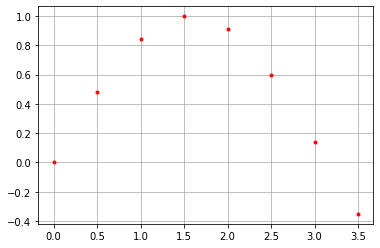

In [52]:
coord = np.array( [ [ 0.0, 0.0 ], [ 0.5, 0.47942 ], [ 1.0, 0.84147 ], [ 1.5, 0.99749 ], [ 2.0, 0.90930 ], [ 2.5, 0.59847 ], [ 3.0, 0.14112 ], [ 3.5, -0.35078 ] ] )
print( coord )
y = coord[ :,0 ]
x = coord[ :, 1]
plt.plot(y,x, "r.") 
plt.grid()
plt.show()

In [53]:
N = 8
x = coord[ :, 0 ] 
X = np.column_stack( [ x**k for k in range( 0, N ) ] )
print( X )
X = np.vander(x,increasing=True)
print(X[:8,:8])

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
  5.06250000e+00 7.59375000e+00 1.13906250e+01 1.70859375e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02 6.10351562e+02]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03]
 [1.00000000e+00 3.50000000e+00 1.22500000e+01 4.28750000e+01
  1.50062500e+02 5.25218750e+02 1.83826562e+03 6.43392969e+03]]

In [54]:
y = coord[ :, 1]
y = np.array( y ).reshape( 8, 1 ) 
print( y )

[[ 0.     ]
 [ 0.47942]
 [ 0.84147]
 [ 0.99749]
 [ 0.9093 ]
 [ 0.59847]
 [ 0.14112]
 [-0.35078]]


In [55]:
solve = la.solve( X, y )
print ( solve )

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


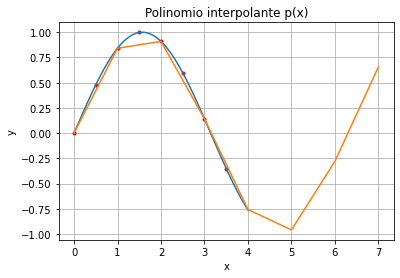

In [56]:
xinter = np.linspace(0,4,200)
yinter = sum( [ solve[ k ]*xinter**k for k in range( 0, N ) ] )
fsin = np.sin( 2*x )
plt.plot( x, y, 'r.', xinter, yinter, fsin )
plt.grid()
plt.title( "Polinomio interpolante p(x)" )
plt.xlabel( "x" )
plt.ylabel( "y" )
plt.show()

ACTIVIDAD 6
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.